## Slice grappa with even and odd kernels 
###### Author: Zimu Huo
###### Date: 05.2022

See the figure 2 in [1]. Slice grappa with even and odd kernels is tailored to the SMS with EPI, as there are imperfections exist in the EPI phase correction. One kernel used for even lines and one kernel used for odd lines. 

-------------------------------------------------------------------------
References

    [1] 
    Author:  Peter J Koopmans
    Title: Two-dimensional-NGC-SENSE-GRAPPA for fast, ghosting-robust reconstruction of in-plane and slice-accelerated blipped-CAIPI echo planar imaging
    Link: https://pubmed.ncbi.nlm.nih.gov/26932565/
    
    [2] 
    Author:  Setsompop K et al. 
    Title: Improving diffusion MRI using simultaneous multi-slice echo planar imaging
    Link: https://pubmed.ncbi.nlm.nih.gov/22732564/

In [1]:
import sys
sys.path.insert(1, '../')
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
import util.simulator as simulate
from util.coil import *
from util.fft import *
import util.mask as undersample
from util.spsg2k import *
import math

In [2]:
indSlice = np.asarray([2, 3], dtype = int)
numSlice = len(indSlice)
R = 2
from util.twix import *
file_sms = "../lib/meas_MID00134_FID55501_catesain_4slices.dat"
file = readtwix(file_sms)
data = file[0]['readouts'][...,:numSlice]
rawImage = ifft2c(data)
fovHeight, fovWidth, numCoil, _ = rawImage.shape

Software version: VD/VE (!?)

Scan  0
100 % parsed in 0 s. Estimated 0 s remaining.
Scan  1
100 % parsed in 1 s. Estimated 0 s remaining.
----------------------------------------------------------------------------------------------------
reading raw data, calculating trajectories and sampling raster 


  0%|          | 0/1063 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
file parsed
----------------------------------------------------------------------------------------------------
loading and preprocessing the data..
----------------------------------------------------------------------------------------------------
dynamically combining data according to dtype, sli, par, rep..


  0%|          | 0/4 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
finished, the output is stored in a list format and each element of the list is a dictionary(except for the noise scan).
To access the data, use file[idx]["readout"] or file[idx]["flags"]
                                                                                                    
idx  file type
0   DATA


In [3]:
rawData = np.zeros(rawImage.shape, dtype = complex)
for sli in range (numSlice):
        rawData[:,:,:,sli] = fft2c(rawImage[:,:,:,sli])

In [4]:
cycle = np.arange(0,1,1/numSlice) * 2* np.pi
numAccq = int(numSlice*fovHeight/R)

In [5]:
shift = cycle*numAccq/(2*np.pi)
dataR = fft2c(simulate.multiSliceCAIPI(rawImage, cycle, R))

In [6]:
ncx = 32
ncy = 32
acsshift = cycle*int(numSlice* ncy/R)/(2*np.pi)
acsK = simulate.acs(rawData, (ncy, ncx))
acsIm = ifft2c(acsK)
calib = fft2c(simulate.singleSliceFov(acsIm,acsshift))

In [7]:
recon = spsg2k(dataR, calib, kh = 3, kw = 3)

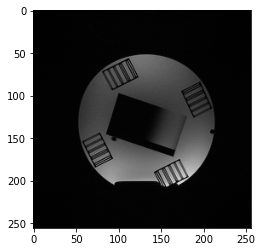

In [8]:
showrsos(ifft2c(recon[:,:,:,0]))